# Car Insurance Claim Prediction

 ## Objective
 
 Predict whether the car insurance policyholder will file a claim within the next 6 months or not. 
 
 This is a binary classification problem.

## Import libraries

In [911]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
%matplotlib inline

## Import data

In [912]:
# import data we will use to train or ML model
df2=pd.read_excel('train.xls')
df2.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [913]:
# Import data we will use to make predictions after we train our model.
# We will create a new file of policy_id and is_claim predictions after we decide what model to use. 
test_df = pd.read_excel('test.xls')
test_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


## Basic Data Analysis

In [914]:
#cheack shape of both dfs
df2.shape, test_df.shape

((58592, 44), (39063, 43))

In [915]:
df2.info() , test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

(None, None)

In [916]:
df2.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


## Data analysis


In [917]:
df2.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [918]:
print(df2.dtypes)

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

we drop policy_id as it is a unique identifier for each row with no predictive value

In [919]:
df2 = df2.drop('policy_id', axis=1)

In [920]:
test_df = test_df.drop('policy_id', axis=1)

In [921]:
# code to give only 'catergorical' columns from df2

catergorical_columns = [col for col in df2.columns
                        if df2[col].dtype.name =='object']

catergorical_columns

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [922]:
# code to give only 'numerical' columns from df2. 

numerical_columns = [col for col in df2.columns
                        if df2[col].dtype.name !='object']

numerical_columns          

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

## Distribution of catergorical features - Histograms


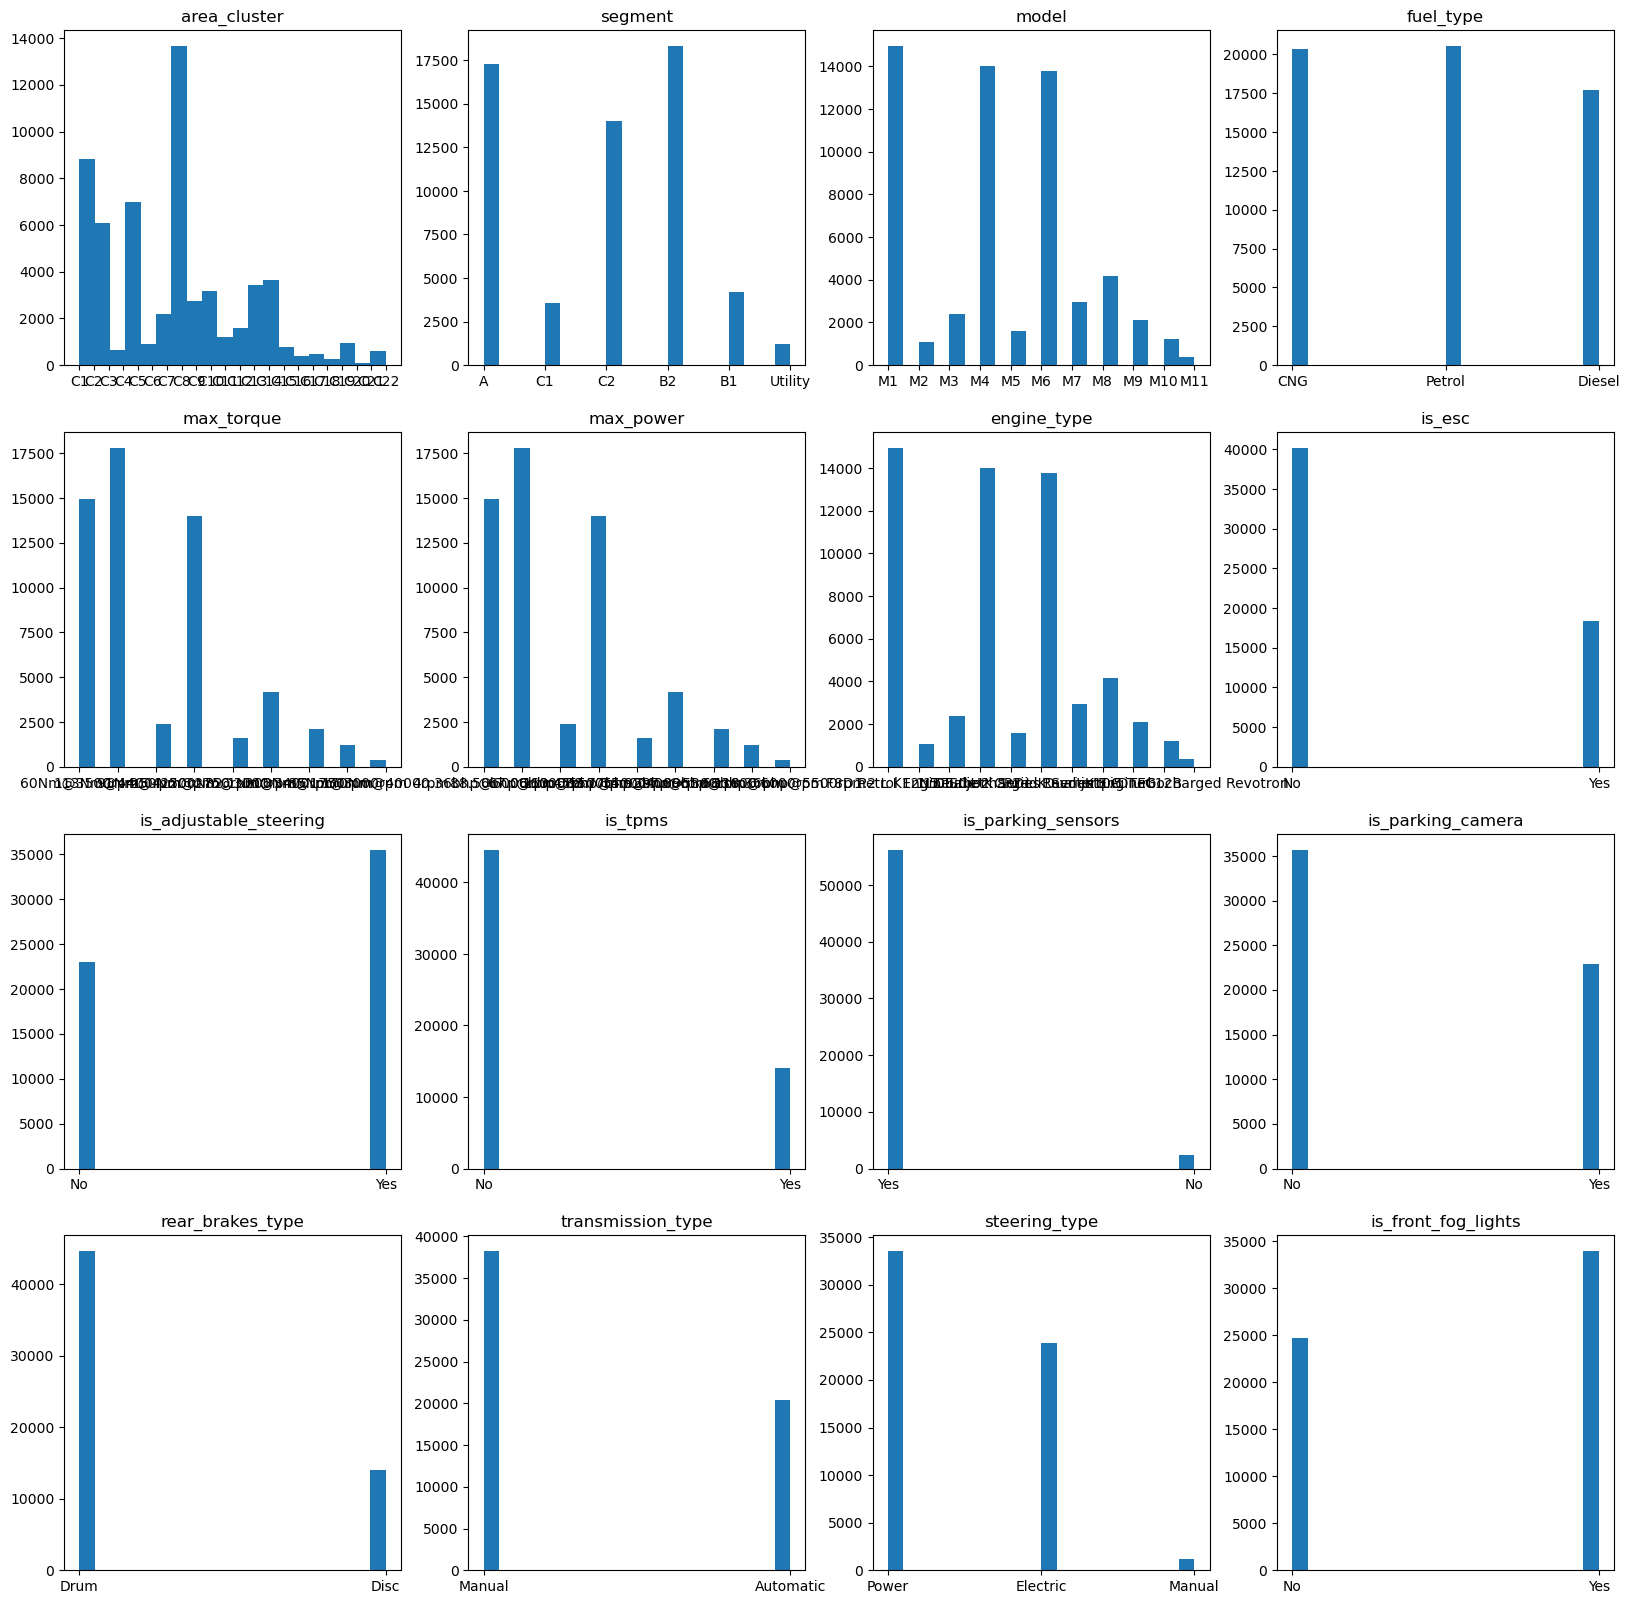

In [923]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the figure
n_rows = 4
n_cols = 4

# Define the size of the figure
figsize = (20, 20)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

# Define the list of column names to plot
columns_to_plot = ['area_cluster',
                     'segment',
                     'model',
                     'fuel_type',
                     'max_torque',
                     'max_power',
                     'engine_type',
                     'is_esc',
                     'is_adjustable_steering',
                     'is_tpms',
                     'is_parking_sensors',
                     'is_parking_camera',
                     'rear_brakes_type',
                     'transmission_type',
                     'steering_type',
                     'is_front_fog_lights',
                     'is_rear_window_wiper',
                     'is_rear_window_washer',
                     'is_rear_window_defogger',
                     'is_brake_assist',
                     'is_power_door_locks',
                     'is_central_locking',
                     'is_power_steering',
                     'is_driver_seat_height_adjustable',
                     'is_day_night_rear_view_mirror',
                     'is_ecw',
                     'is_speed_alert']


# Iterate over the subplots and plot the corresponding column
for i in range(n_rows):
    for j in range(n_cols):
        col_index = i * n_cols + j
        if col_index < len(columns_to_plot):
            col_name = columns_to_plot[col_index]
            axs[i, j].hist(df2[col_name], bins=20)
            axs[i, j].set_title(col_name)

# Display the plot
plt.show()


In [924]:
print(df2.columns)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')


In [925]:
print(test_df.columns)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')


columns for test_df is the same as df2 but with not is_claim column (target variable)

## Distribution of numerical features - Histograms

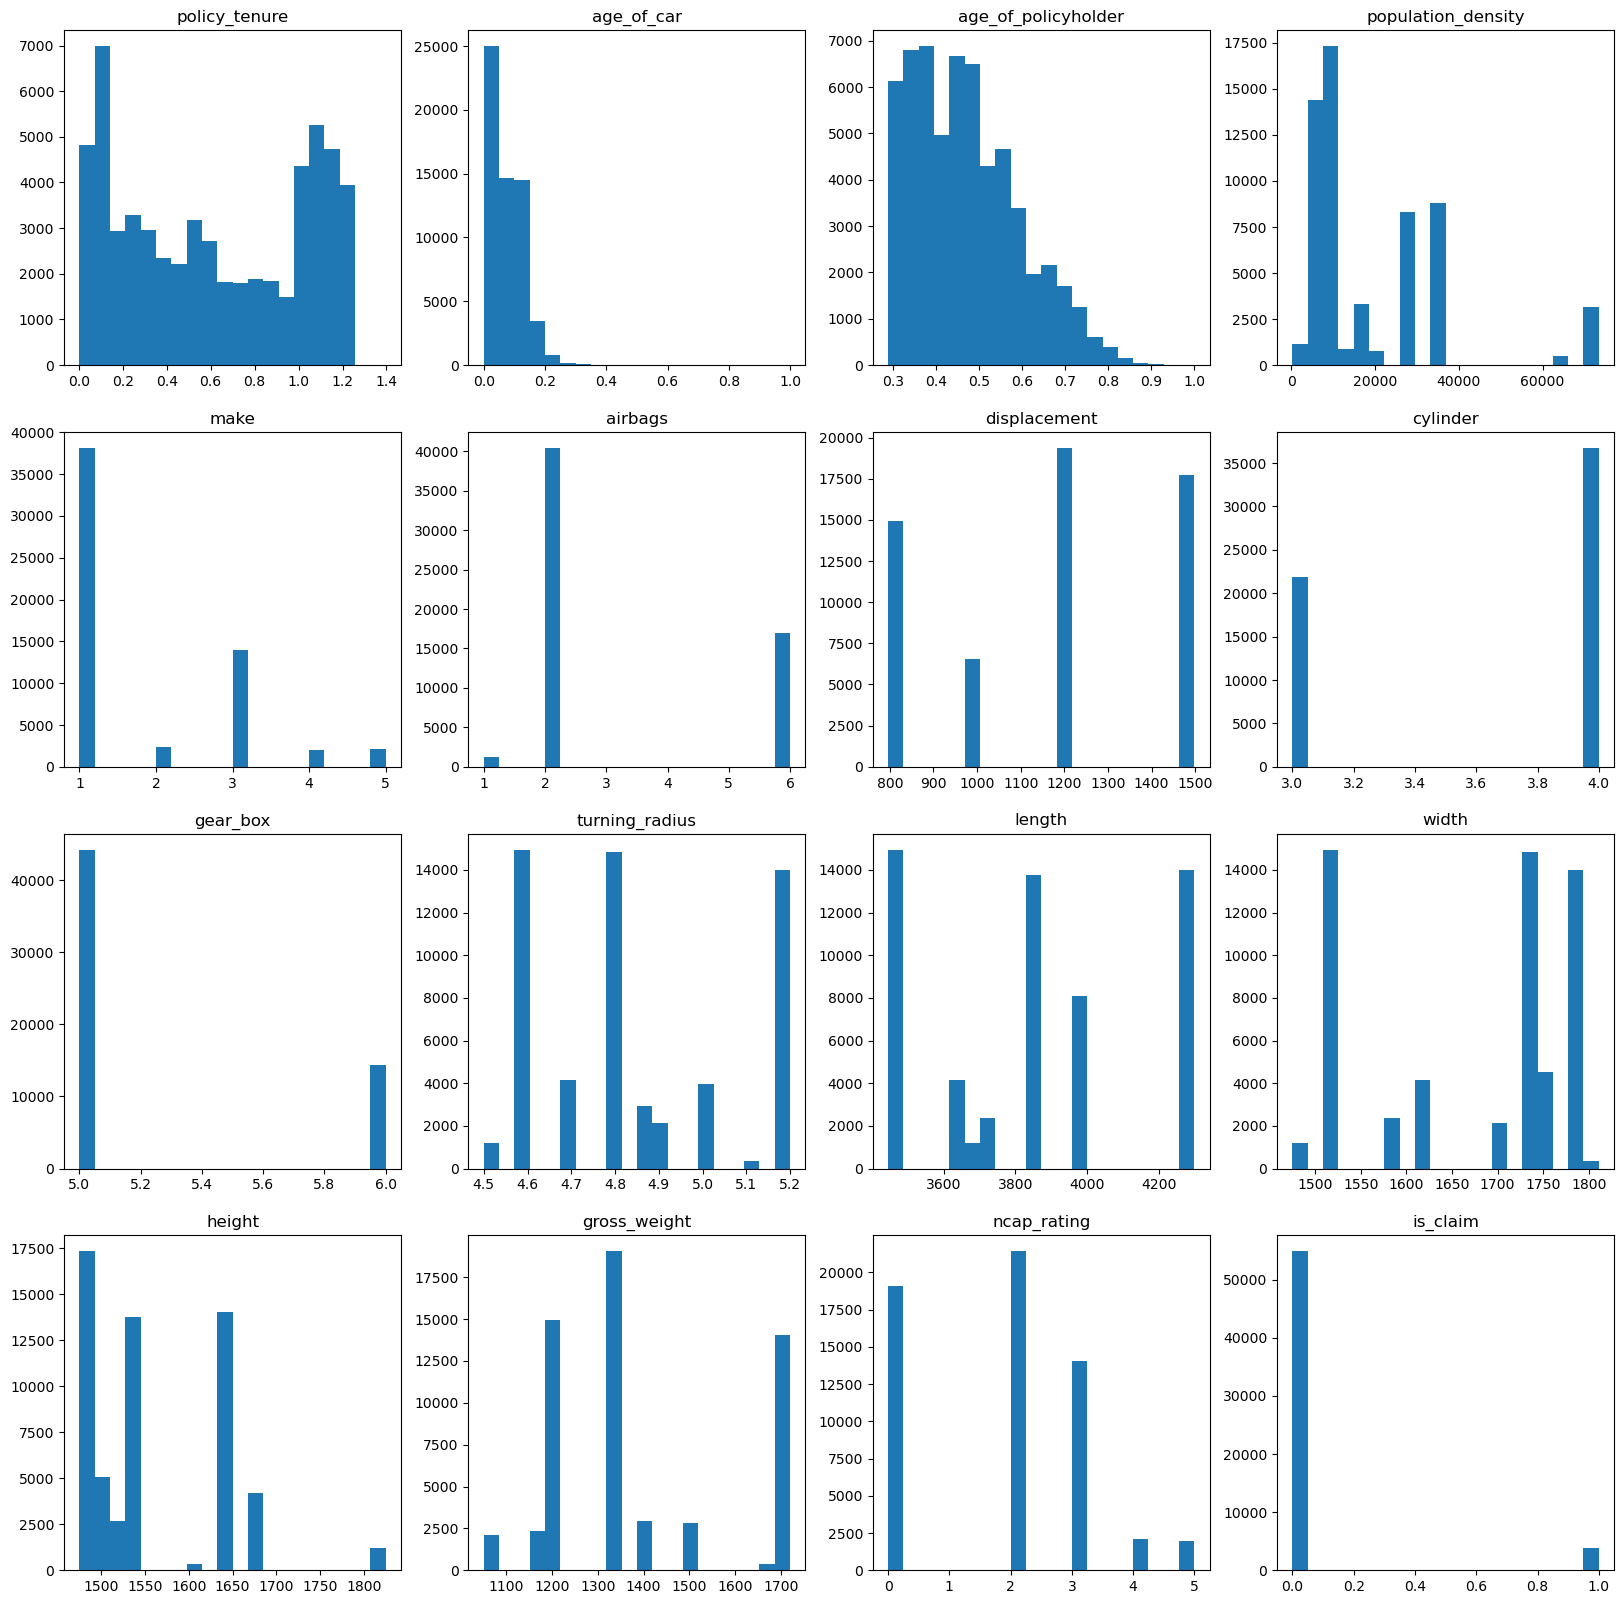

In [926]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the figure
n_rows = 4
n_cols = 4

# Define the size of the figure
figsize = (20, 20)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

# Define the list of column names to plot
columns_to_plot = ['policy_tenure',
                     'age_of_car',
                     'age_of_policyholder',
                     'population_density',
                     'make',
                     'airbags',
                     'displacement',
                     'cylinder',
                     'gear_box',
                     'turning_radius',
                     'length',
                     'width',
                     'height',
                     'gross_weight',
                     'ncap_rating',
                     'is_claim']

# Iterate over the subplots and plot the corresponding column
for i in range(n_rows):
    for j in range(n_cols):
        col_index = i * n_cols + j
        if col_index < len(columns_to_plot):
            col_name = columns_to_plot[col_index]
            axs[i, j].hist(df2[col_name], bins=20)
            axs[i, j].set_title(col_name)

# Display the plot
plt.show()


Next steps:
1. Load the dataset and split it into training and testing sets. - done
2. Encode the categorical features using OneHotEncoder or LabelEncoder.
3. Scale the numerical features using StandardScaler or MinMaxScaler.
4. Combine the encoded categorical features and scaled numerical features back into one dataframe.

## Feature engineering - part 1 create dummy variables

We have created histograms to see the distribution for each variable. We have also split our variable by numerical and catergorical variables using a for loop

Create dummy variables to categorical columns.
We used the function get_dummies and features dataframe to apply OneHotEncoder to the column:

- age_of_car
- age_of_policyholder
- population_density
- length
- width
- ncap_rating
- is_claim

Assign the value to the variable features_one_hot, display the results using the method head. Our result dataframe must include all features including the encoded ones.

In [927]:
# We Use get_dummies() function on the categorical columns to convert to numerical values

cat_df = pd.get_dummies(df2, columns = ['area_cluster',
                     'segment',
                     'model',
                     'fuel_type',
                     'max_torque',
                     'max_power',
                     'engine_type',
                     'is_esc',
                     'is_adjustable_steering',
                     'is_tpms',
                     'is_parking_sensors',
                     'is_parking_camera',
                     'rear_brakes_type',
                     'transmission_type',
                     'steering_type',
                     'is_front_fog_lights',
                     'is_rear_window_wiper',
                     'is_rear_window_washer',
                     'is_rear_window_defogger',
                     'is_brake_assist',
                     'is_power_door_locks',
                     'is_central_locking',
                     'is_power_steering',
                     'is_driver_seat_height_adjustable',
                     'is_day_night_rear_view_mirror',
                     'is_ecw',
                     'is_speed_alert'])
cat_df.head()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,...,0,1,0,1,0,1,0,1,0,1
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,...,0,1,1,0,0,1,0,1,0,1


We see now we only have numerical values on our catergorical dataframe as they have been converted from catergorical vlaues using OneHotEncoder

In [928]:
cat_test_df = pd.get_dummies(test_df, columns = ['area_cluster',
                     'segment',
                     'model',
                     'fuel_type',
                     'max_torque',
                     'max_power',
                     'engine_type',
                     'is_esc',
                     'is_adjustable_steering',
                     'is_tpms',
                     'is_parking_sensors',
                     'is_parking_camera',
                     'rear_brakes_type',
                     'transmission_type',
                     'steering_type',
                     'is_front_fog_lights',
                     'is_rear_window_wiper',
                     'is_rear_window_washer',
                     'is_rear_window_defogger',
                     'is_brake_assist',
                     'is_power_door_locks',
                     'is_central_locking',
                     'is_power_steering',
                     'is_driver_seat_height_adjustable',
                     'is_day_night_rear_view_mirror',
                     'is_ecw',
                     'is_speed_alert'])
cat_test_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,0.341732,0.00,0.586538,4076,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1
1,0.307241,0.13,0.442308,8794,1,2,1197,4,5,4.8,...,0,1,0,1,0,1,0,1,0,1
2,0.327924,0.12,0.451923,8794,2,2,999,3,5,5.0,...,0,1,1,0,0,1,0,1,0,1
3,0.782654,0.01,0.461538,34738,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1
4,1.233404,0.02,0.634615,34738,1,2,796,3,5,4.6,...,0,1,1,0,1,0,1,0,0,1


We have done the same numerical conversion with the test dataset 

In [929]:
cat_df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius',
       ...
       'is_power_steering_No', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_No',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_No', 'is_day_night_rear_view_mirror_Yes',
       'is_ecw_No', 'is_ecw_Yes', 'is_speed_alert_No', 'is_speed_alert_Yes'],
      dtype='object', length=128)

In [930]:
cat_df.dtypes

policy_tenure                        float64
age_of_car                           float64
age_of_policyholder                  float64
population_density                     int64
make                                   int64
                                      ...   
is_day_night_rear_view_mirror_Yes      uint8
is_ecw_No                              uint8
is_ecw_Yes                             uint8
is_speed_alert_No                      uint8
is_speed_alert_Yes                     uint8
Length: 128, dtype: object

so we see what all we have done is convert all the catergorical features into numerical ones. and kept the original numerical features on the df

In [931]:
df2.shape

(58592, 43)

In [932]:
cat_df.shape, cat_test_df.shape

((58592, 128), (39063, 127))

In [933]:
num_df = df2[['policy_tenure',
                     'age_of_car',
                     'age_of_policyholder',
                     'population_density',
                     'make',
                     'airbags',
                     'displacement',
                     'cylinder',
                     'gear_box',
                     'turning_radius',
                     'length',
                     'width',
                     'height',
                     'gross_weight',
                     'ncap_rating',
                     'is_claim']]

num_df.head()

# so these columns always had numerical data in it.


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0


In [934]:
num_test_df = test_df[['policy_tenure',
                     'age_of_car',
                     'age_of_policyholder',
                     'population_density',
                     'make',
                     'airbags',
                     'displacement',
                     'cylinder',
                     'gear_box',
                     'turning_radius',
                     'length',
                     'width',
                     'height',
                     'gross_weight',
                     'ncap_rating']]

num_test_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.341732,0.00,0.586538,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0
1,0.307241,0.13,0.442308,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2
2,0.327924,0.12,0.451923,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2
3,0.782654,0.01,0.461538,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0
4,1.233404,0.02,0.634615,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0


In [935]:
num_df.shape, num_test_df.shape

((58592, 16), (39063, 15))

In [936]:
num_df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

## Feature engineering - part 2 - Scale the numerical features 

1. Load the dataset and split it into training and testing sets. - done
2. Encode the categorical features using OneHotEncoder or LabelEncoder. - done
3. Scale the numerical features using StandardScaler or MinMaxScaler.
4. Combine the encoded categorical features and scaled numerical features back into one dataframe.

In [937]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Select the numerical columns you want to scale
numerical_cols = ['policy_tenure',
                     'age_of_car',
                     'age_of_policyholder',
                     'population_density',
                     'make',
                     'airbags',
                     'displacement',
                     'cylinder',
                     'gear_box',
                     'turning_radius',
                     'length',
                     'width',
                     'height',
                     'gross_weight',
                     'ncap_rating'] # note: i have taken out is_claim

# Instantiate a StandardScaler or MinMaxScaler object
# and fit it to the numerical data
scaler = StandardScaler() # or MinMaxScaler()
scaler.fit(num_df[numerical_cols])

# Transform the numerical data using the fitted scaler
scaled_data = scaler.transform(num_df[numerical_cols])

# Create a new dataframe with the scaled numerical data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Concatenate the encoded categorical features and scaled numerical features
combined_df = pd.concat([cat_df, scaled_df], axis=1)

In [938]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Select the numerical columns you want to scale
numerical_cols = ['policy_tenure',
                     'age_of_car',
                     'age_of_policyholder',
                     'population_density',
                     'make',
                     'airbags',
                     'displacement',
                     'cylinder',
                     'gear_box',
                     'turning_radius',
                     'length',
                     'width',
                     'height',
                     'gross_weight',
                     'ncap_rating'] # note: i have taken out is_claim

# Instantiate a StandardScaler or MinMaxScaler object
# and fit it to the numerical data
scaler = StandardScaler() # or MinMaxScaler()
scaler.fit(num_test_df[numerical_cols])

# Transform the numerical data using the fitted scaler
scaled_test_data = scaler.transform(num_test_df[numerical_cols])

# Create a new dataframe with the scaled numerical data
scaled_test_df = pd.DataFrame(scaled_test_data, columns=numerical_cols)

# Concatenate the encoded categorical features and scaled numerical features
combined_test_df = pd.concat([cat_test_df, scaled_test_df], axis=1)

In [939]:
combined_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,...,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,...,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,...,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,...,-0.620458,0.130093,0.771357,-0.570334,-0.231926,0.464026,0.559973,-0.481470,-0.236684,0.172752
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,...,-0.620458,-0.613422,-1.296417,-0.570334,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0.172752


'combined_df' is the df we will use to train our model and make sure it works well at making predictions. 

In [940]:
combined_test_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.341732,0.00,0.586538,4076,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675
1,0.307241,0.13,0.442308,8794,1,2,1197,4,5,4.8,...,-0.622425,0.136339,0.781863,-0.570857,-0.233370,-0.013867,0.564650,-0.291451,-0.232706,0.173628
2,0.327924,0.12,0.451923,8794,2,2,999,3,5,5.0,...,-0.622425,-0.605403,-1.278996,-0.570857,0.643603,-0.379044,-0.828555,-0.797592,-1.078881,0.173628
3,0.782654,0.01,0.461538,34738,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675
4,1.233404,0.02,0.634615,34738,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675


'combined_test_df' is the df we will use to make predictions based on the ML model that we decide to use after it has been trained. 

In [941]:
combined_df['is_claim'].unique()

array([0, 1])

In [942]:
combined_df['is_claim']

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

## Create the models - This is a classification model of 0 and 1

1. Load the dataset and split it into training and testing sets. - done
2. Encode the categorical features using OneHotEncoder or LabelEncoder. - done
3. Scale the numerical features using StandardScaler or MinMaxScaler. - done 
4. Combine the encoded categorical features and scaled numerical features back into one dataframe. - done

5. Split the preprocessed dataset into X (features) and y (target).
6. Split the preprocessed dataset into training and testing sets.
7. Train a machine learning model on the training data using a suitable algorithm, such as logistic regression or random forest.
8. Evaluate the model's performance on the testing data using appropriate metrics, such as accuracy or AUC-ROC.
9. Tune the hyperparameters of the model to optimize its performance.

In [943]:
combined_df.shape, combined_test_df.shape

((58592, 143), (39063, 142))

In [944]:
df2.shape

(58592, 43)

In [945]:
X = combined_df.drop('is_claim', axis = 1)
y = combined_df['is_claim']

In [946]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [947]:
# Verify the results
print("X_train:", X_train.shape) # we use these features to train model
print("Y_train:", y_train.shape) # we use this is_claim results to train model
print("X_test:", X_test.shape) # we use these features to test the model 
print("Y_test:", y_test.shape) # when we get the predicted results from the test (y_pred) we then compare to the y_test, which are the actual results. 

X_train: (46873, 142)
Y_train: (46873,)
X_test: (11719, 142)
Y_test: (11719,)


## Creation of a function to plot confusion matrix

In [948]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Decison Tree model - Classification 1

In [949]:
#import model libary
from sklearn.tree import DecisionTreeClassifier

#create model
model = DecisionTreeClassifier()

# Fit/Train model
model.fit(X,y)

# ask model to make predictions 
y_pred1 = model.predict(X_test)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [950]:
# decision tree f1 score:

f1_score(y_test,y_pred1)

1.0

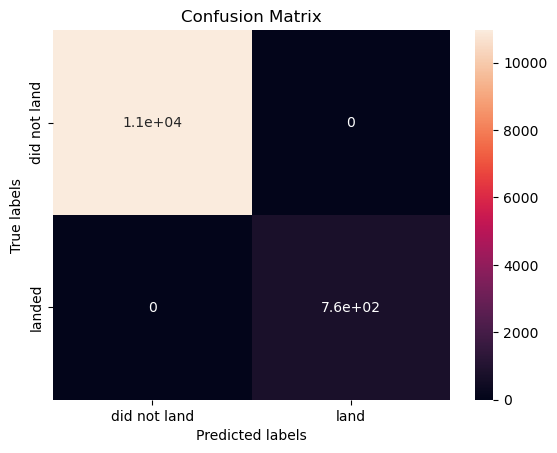

In [951]:
plot_confusion_matrix(y_test,y_pred1)

In [952]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)

print("R-squared: {:.2f}".format(r2))  # the higher the better 
print("Mean squared error: {:.2f}".format(mse)) # the lower the better
print("Mean absolute error: {:.2f}".format(mae)) # the lower the better

R-squared: 1.00
Mean squared error: 0.00
Mean absolute error: 0.00


## Random forest  - classification 2

In [953]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,f1_score

dt=RandomForestClassifier(n_estimators=1000,
                         criterion='gini',
                         max_depth=12,
                         max_features='log2',
                         min_samples_leaf=1,
                         min_samples_split=5,
                         random_state=42)

# Train Model
dt.fit(X_train,y_train)


# Training set performance
train_accuracy= dt.score(X_train,y_train)

#Testing set performance
test_accuracy=dt.score(X_test,y_test)


print('Accuracy for Training set is')
print( 100*train_accuracy)
print('Accuracy for Testing set is')
print( 100*test_accuracy)


y_pred3 = model.predict(X_test)
y_pred3

Accuracy for Training set is
93.6167943165575
Accuracy for Testing set is
93.54893762266406


array([0, 0, 0, ..., 1, 0, 0])

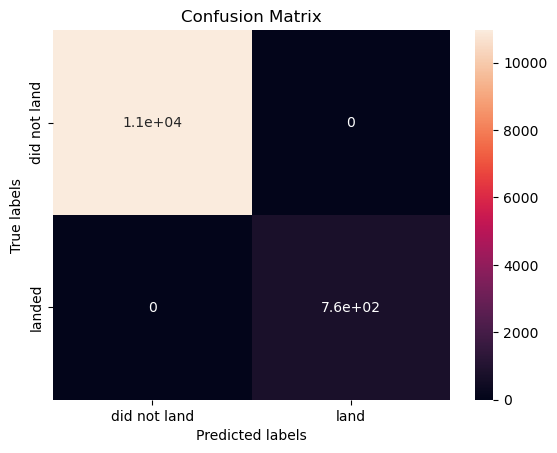

In [954]:
plot_confusion_matrix(y_test,y_pred3)

## Results

Decision tree is most accurate model so this is what we will use on the test dataset (combined_test_df) to make predictions for submission to the kaggle competition.

In [955]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [956]:
test.shape

(39063, 43)

In [957]:
combined_test_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.341732,0.00,0.586538,4076,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675
1,0.307241,0.13,0.442308,8794,1,2,1197,4,5,4.8,...,-0.622425,0.136339,0.781863,-0.570857,-0.233370,-0.013867,0.564650,-0.291451,-0.232706,0.173628
2,0.327924,0.12,0.451923,8794,2,2,999,3,5,5.0,...,-0.622425,-0.605403,-1.278996,-0.570857,0.643603,-0.379044,-0.828555,-0.797592,-1.078881,0.173628
3,0.782654,0.01,0.461538,34738,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675
4,1.233404,0.02,0.634615,34738,1,2,796,3,5,4.6,...,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,-1.295191,-1.400127,-0.987394,-0.937852,-1.268675


In [958]:
combined_test_df.shape

(39063, 142)

## Decision tree predicitions on test dataset (combined_test_df)

In [959]:
y_pred1 = model.predict(combined_test_df)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

## Save results to new file

In [960]:
# Final Results file
results = pd.DataFrame()
results['policy_id'] = policy_id 
results['is_claim'] = y_pred1
results.to_csv('final_submission.csv', index=None)